Let's preprocess the data first!

In [5]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns 
import plotnine as gg 
from plotnine import ggplot

In [3]:
participants = pd.read_csv('participants.csv')

trials = pd.DataFrame()
for participant_id in participants['id']:
    participant_data = pd.read_csv(f'results/{participant_id}.csv')
    trials = trials.append(participant_data)

trials

/var/folders/yr/vf28v1mn2y1ck9bp7ljl0p8h0000gn/T/ipykernel_69139/71405584.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trials = trials.append(participant_data)
/var/folders/yr/vf28v1mn2y1ck9bp7ljl0p8h0000gn/T/ipykernel_69139/71405584.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trials = trials.append(participant_data)
/var/folders/yr/vf28v1mn2y1ck9bp7ljl0p8h0000gn/T/ipykernel_69139/71405584.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trials = trials.append(participant_data)


,Unnamed: 0,trial,cond,start_time,end_time,key,id,reaction_time
0,0,recht,HF,2.718182,3.838300,z,P_165435,1.120117
1,1,gals,none,5.352657,6.295809,m,P_165435,0.943152
2,2,slont,none,7.810418,8.713127,m,P_165435,0.902709
3,3,baby,HF,10.226432,10.973984,z,P_165435,0.747552
4,4,boek,HF,12.486627,13.213963,z,P_165435,0.727336
5,5,imams,LF,14.726606,15.430361,m,P_165435,0.703755
6,6,goont,none,16.943319,17.694142,m,P_165435,0.750824
7,7,plan,HF,19.207660,19.846547,z,P_165435,0.638888
8,8,women,none,21.359490,22.022061,z,P_165435,0.662571
9,9,buidels,LF,23.540104,24.230132,m,P_165435,0.690029


In [4]:
trials.rename(columns={'Unnamed: 0': 'trial_order'}, inplace=True)
trials.to_csv('trials.csv', index=False)

Preprocessing done!

It's time for summarizing and visualizing the data!!

In [7]:
participants = pd.read_csv('participants.csv')
trials = pd.read_csv('trials.csv')

merged = trials.merge(participants, on='id')

# trials.groupby(by='id').describe()
summary = merged.groupby(by='cond').aggregate(
    mean_RT=pd.NamedAgg('reaction_time', np.mean),
    std_RT=pd.NamedAgg('reaction_time', np.std),
    age=pd.NamedAgg('age', np.mean)
)

summary.reset_index(inplace=True)

summary

,cond,mean_RT,std_RT,age
0,HF,0.770645,0.153705,25.666667
1,LF,0.709639,0.101922,25.666667
2,none,0.759563,0.128258,25.666667


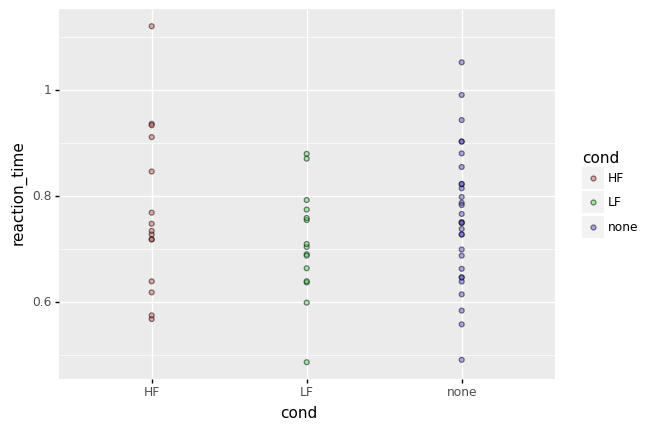

In [11]:
plot = (
    ggplot(gg.aes(x='cond', y='reaction_time', fill='cond'), data=trials) +
    gg.geom_point(alpha=0.5)
)
plot.draw()
plt.show()

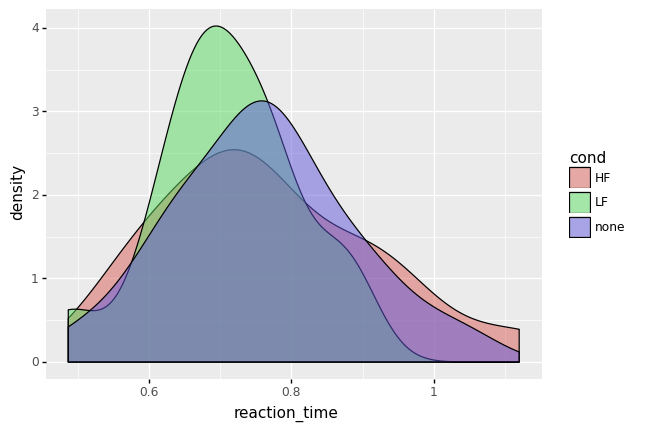

In [16]:
plot = (
    ggplot(gg.aes(x = 'reaction_time', fill = 'cond'), data=trials) +
    gg.geom_density(alpha = 0.5)
)
plot.draw()
plt.show()

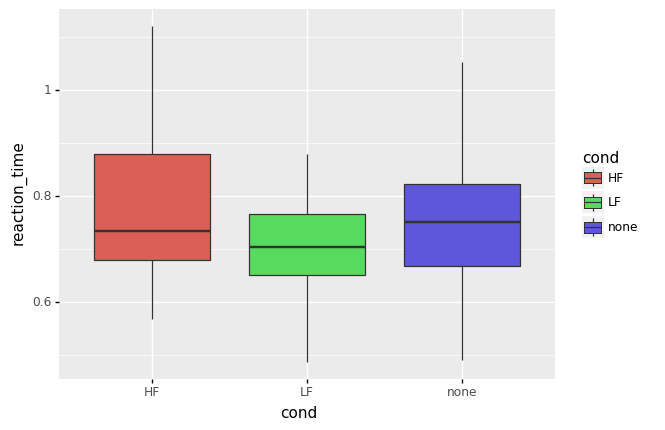

In [18]:
plot = (
    ggplot(gg.aes(x = 'cond', y = 'reaction_time', fill = 'cond'), data=trials) +
    gg.geom_boxplot()
)
plot.draw()
plt.show()